In [ ]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = math.tanh(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = 1/(1 + np.exp(-(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [ ]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)

x_val = x_train[:int(n*r)]
partial_x_train = x_train[int(n*r):]
y_val = y_train[:int(n*r)]
partial_y_train = y_train[int(n*r):]

*** Write down your answer here ***

Formula of bias for layer 2

$$\frac{\partial L}{\partial b^2} = (\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1
\$$

Formula of weights of layer 2
$$\frac{\partial L}{\partial \vec{w}^{\,(2)}} = \begin{bmatrix}
\frac{\partial L}{\partial w^2_{11}}\\
\frac{\partial L}{\partial w^2_{21}} \\
\frac{\partial L}{\partial w^2_{31}}
\end{bmatrix} = \begin{bmatrix}
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1 h^{1}_1
\\
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1 h^{1}_2
\\
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1 h^{1}_3
\\
\end{bmatrix}
$$

Formula of biases of layer 1
$$\frac{\partial L}{\partial \vec{b}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial b^1_1}\\
\frac{\partial L}{\partial b^1_2}\\
\frac{\partial L}{\partial b^1_3}
\end{bmatrix} = \begin{bmatrix}
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{11}(1 - ({h}^1_1)^2)\\
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{21}(1 - ({h}^1_2)^2)\\
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{31}(1 - ({h}^1_3)^2)\\
\end{bmatrix}
$$

Formula of weights of layer 1
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} =\begin{bmatrix}
\frac{\partial L}{\partial w^1_{11}} & \frac{\partial L}{\partial w^1_{12}} & \frac{\partial L}{\partial w^1_{13}} \\
\frac{\partial L}{\partial w^1_{21}} & \frac{\partial L}{\partial w^1_{22}}  & \frac{\partial L}{\partial w^1_{23}}
\end{bmatrix} =
\begin{bmatrix}
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{11}(1 - ({h}^1_1)^2)x_1 & (\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{21}(1 - ({h}^1_2)^2)x_1 & (\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{31}(1 - ({h}^1_3)^2)x_1\\
(\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{11}(1 - ({h}^1_1)^2)x_2 & (\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{21}(1 - ({h}^1_2)^2)x_2 & (\hat{y}_1 - y_1)(1 - \hat{y}_1)\hat{y}_1{w}^{2}_{31}(1 - ({h}^1_3)^2)x_2\\
\end{bmatrix}
$$

In [ ]:
import numpy as np

w1_11, w1_12, w1_13, w1_21, w1_22, w1_23 = np.random.uniform(-1, 1, 6)
w2_11, w2_21, w2_31 = np.random.uniform(-1, 1, 3)
b1_1, b1_2, b1_3, b2 = np.random.uniform(-1, 1, 4)


class NeuralNetwork:
    def __init__(self):
        self.history_dict = {'loss': [], 'val_loss': []}

nn = NeuralNetwork()

# Hidden layer activations (Layer 1)
# a1,1 = x,1*w1,11 + b1,1 + x,2 * w1,21
# a1,2 = x,1 * w1,12 +x,2*w1,22 + b1,2
# a1,3 = x,1*w1,13 + x,2*w1,23 + b1,3

# Hidden layer outputs
# h1,1 = tanh(a1,1)
# h1,2 = tanh(a1,2)
# h1,3 = tanh(a1,3)

# Output layer activation (Layer 2)
# a2,1 = b2 + h1,1*w2,11 +h1,2*w2,21 + h1,3*w2,31

# Output layer output
# y_hat = h2,1 = 1 / (1 + e^-a2,1)

def feedforward(x_1, x_2):
    a1_1 = x_1 * w1_11 + x_2 * w1_21 + b1_1
    a1_2 = x_1 * w1_12 + x_2 * w1_22 + b1_2
    a1_3 = x_1 * w1_13 + x_2 * w1_23 + b1_3

    h1_1 = np.tanh(a1_1)
    h1_2 = np.tanh(a1_2)
    h1_3 = np.tanh(a1_3)

    a2_1 = h1_1 * w2_11 + h1_2 * w2_21 + h1_3 * w2_31 + b2
    h2_1 = 1 / (1 + np.exp(-a2_1))

    return h2_1, h1_1, h1_2, h1_3
# backprop
# W(1) = [#(y^ - y)(1 - y^)y^w2,11(1-(h1,1)^2x,1) #(y^ - y)(1 - y^)y^w2,21(1-(h1,2)^2x,1) #(y^ - y)(1 - y^)y^w2,31(1-(h1,3)^2x,1)
          #(y^ - y)(1 - y^)y^w2,11(1-(h1,1)^2x,2) #(y^ - y)(1 - y^)y^w2,21(1-(h1,2)^2x,2) #(y^ - y)(1 - y^)y^w2,31(1-(h1,3)^2x,2)]
# b(1) = [#(y^ - y)(1 - y^)y^w2,11(1-(h1,1)^2)
          #(y^ - y)(1 - y^)y^w2,21(1-(h1,2)^2)
          #(y^ - y)(1 - y^)y^w2,31(1-(h1,3)^2)]
# w(2) = [#(y^ - y)(1 - y^)y^h1,1
          #(y^ - y)(1 - y^)y^h1,2
          #(y^ - y)(1 - y^)y^h1,3]
# b(2) = [(y^ - y)(1 - y^)y^]

#dL_db_2 = (h_2 - y) * h_2 * (1 - h_2)

#w2_11 -= learning_rate * dL_db_2 * h1_1
#w2_21 -= learning_rate * dL_db_2 * h1_2
#w2_31 -= learning_rate * dL_db_2 * h1_3
#b2 -= learning_rate * dL_db_2

#dL_db1_1 = dL_db_2 * w2_11 * (1 - h1_1**2)
#dL_db1_2 = dL_db_2 * w2_21 * (1 - h1_2**2)
#dL_db1_3 = dL_db_2 * w2_31 * (1 - h1_3**2)

#w1_11 -= learning_rate * dL_db1_1 * x_1
#w1_12 -= learning_rate * dL_db1_2 * x_1
#w1_13 -= learning_rate * dL_db1_3 * x_1
#w1_21 -= learning_rate * dL_db1_1 * x_2
#w1_22 -= learning_rate * dL_db1_2 * x_2
#w1_23 -= learning_rate * dL_db1_3 * x_2

#b1_1 -= learning_rate * dL_db1_1
#b1_2 -= learning_rate * dL_db1_2
#b1_3 -= learning_rate * dL_db1_3

def backpropagation(x_1, x_2, y, h2_1, h1_1, h1_2, h1_3):
    global w1_11, w1_12, w1_13, w1_21, w1_22, w1_23, w2_11, w2_21, w2_31, b1_1, b1_2, b1_3, b2

    dL_db_2 = (h2_1 - y) * h2_1 * (1 - h2_1)

    w2_11 -= learning_rate * dL_db_2 * h1_1
    w2_21 -= learning_rate * dL_db_2 * h1_2
    w2_31 -= learning_rate * dL_db_2 * h1_3
    b2 -= learning_rate * dL_db_2

    dL_db1_1 = dL_db_2 * w2_11 * (1 - h1_1**2)
    dL_db1_2 = dL_db_2 * w2_21 * (1 - h1_2**2)
    dL_db1_3 = dL_db_2 * w2_31 * (1 - h1_3**2)

    w1_11 -= learning_rate * dL_db1_1 * x_1
    w1_12 -= learning_rate * dL_db1_2 * x_1
    w1_13 -= learning_rate * dL_db1_3 * x_1
    w1_21 -= learning_rate * dL_db1_1 * x_2
    w1_22 -= learning_rate * dL_db1_2 * x_2
    w1_23 -= learning_rate * dL_db1_3 * x_2

    b1_1 -= learning_rate * dL_db1_1
    b1_2 -= learning_rate * dL_db1_2
    b1_3 -= learning_rate * dL_db1_3


def train(epochs, partial_x_train, partial_y_train, x_val, y_val):
    for epoch in range(epochs):
        train_loss = 0
        for i in range(len(partial_x_train)):
            x_1, x_2 = partial_x_train[i]
            y = partial_y_train[i]
            h2_1, h1_1, h1_2, h1_3 = feedforward(x_1, x_2)
            backpropagation(x_1, x_2, y, h2_1, h1_1, h1_2, h1_3)
            train_loss += 0.5 * (y - h2_1) ** 2

        val_loss = 0
        for i in range(len(x_val)):
            x_1, x_2 = x_val[i]
            y = y_val[i]
            h2_1, h1_1, h1_2, h1_3 = feedforward(x_1, x_2)
            val_loss += 0.5 * (y - h2_1) ** 2

        train_loss /= len(partial_x_train)
        nn.history_dict['loss'].append(train_loss)
        val_loss /= len(x_val)
        nn.history_dict['val_loss'].append(val_loss)

        print(f"{epoch + 1}/{epochs} loss: {float(val_loss)} loss: {float(train_loss)}")


def predict(x_test):
    predictions = []
    for i in range(len(x_test)):
        x_1, x_2 = x_test[i]
        h2_1, h1_1, h1_2, h1_3 = feedforward(x_1, x_2)
        predictions.append(h2_1)
    return predictions
epochs = 60
learning_rate = 0.01

train(epochs, partial_x_train, partial_y_train, x_val, y_val)
y_pred = predict(x_test)


loss_values = nn.history_dict['loss']
val_loss_values = nn.history_dict['val_loss']
history_dict = {}
history_dict['loss'] = nn.history_dict['loss']


1/60 loss: 0.048174747859773354 loss: 0.053797962577874676
2/60 loss: 0.04466370713214351 loss: 0.04925355901597261
3/60 loss: 0.04169175685236923 loss: 0.0453274699189616
4/60 loss: 0.03919656694348979 loss: 0.04198065899586575
5/60 loss: 0.037104198544708394 loss: 0.039147750420460925
6/60 loss: 0.035340722248526205 loss: 0.03675280068224586
7/60 loss: 0.033839095086307704 loss: 0.03472039857723807
8/60 loss: 0.03254224107737933 loss: 0.03298208030627694
9/60 loss: 0.0314036323647095 loss: 0.03147914477720658
10/60 loss: 0.030386489939942904 loss: 0.030163153652856264
11/60 loss: 0.029462383059988138 loss: 0.028995168933371514
12/60 loss: 0.028609693551655956 loss: 0.02794444290756439
13/60 loss: 0.027812185552889456 loss: 0.026986983147839146
14/60 loss: 0.027057780553687016 loss: 0.026104210148078424
15/60 loss: 0.026337559612257 loss: 0.025281798845201923
16/60 loss: 0.025644976649255944 loss: 0.024508725366533486
17/60 loss: 0.024975251783108825 loss: 0.02377650606407697
18/60 lo

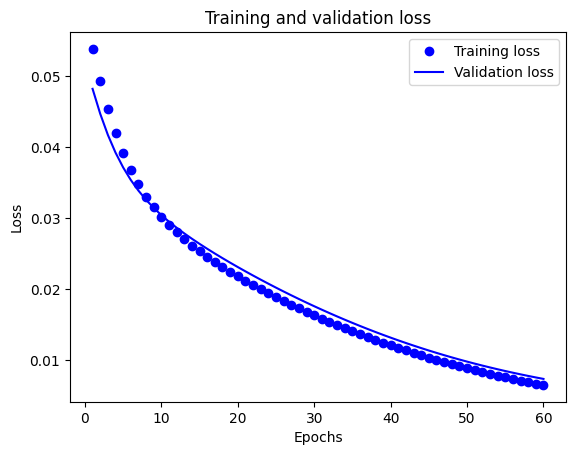

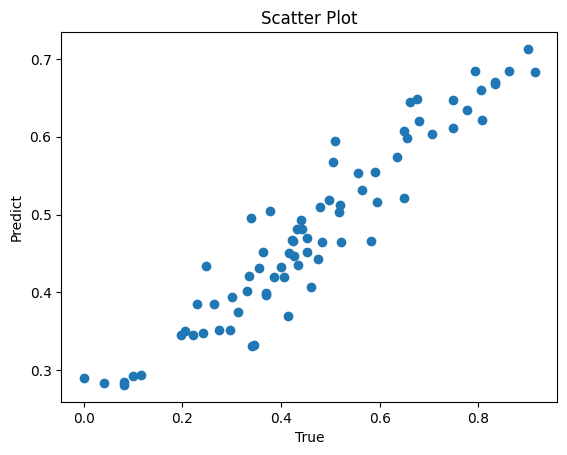

In [ ]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)